<a href="https://colab.research.google.com/github/Jelivian18/Big-Data-Analytics/blob/main/Tugas_Praktek_Big_Data_Analytics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA & Customer Segmentation - Online_retail_II**

**Exploratory Data Analysis (EDA)**

Melalui EDA, wawasan penting telah terungkap, termasuk tren penjualan, popularitas produk, pola pembelian pelanggan, dan variasi transaksi geografis.


**Customer Segmentation**

Teknik segmentasi tingkat lanjut mengkategorikan pelanggan berdasarkan perilaku pembelian, preferensi, dan demografi, memungkinkan pemasaran bertarget dan meningkatkan pengalaman pelanggan.

**Project Goals**

*   Lakukan EDA komprehensif untuk pemahaman kumpulan data.
*   Perform Customer Segmentation for targeted strategies.
*   Lakukan Segmentasi Pelanggan untuk strategi yang ditargetkan.






**1.0. Load Data**

In [ ]:
# Jalankan ini hanya ketika Anda menjalankan skrip menggunakan google colaboratory
from google.colab import drive
drive.mount('/content/drive')

import os
# sesuaikan pathnya dengan path folder google drive anda sendiri
os.chdir("/content/drive/My Drive/Big Data Analytics/Online Retail II UCI")

Mounted at /content/drive


**2.0. Importing Dataset**

In [ ]:
## operational packages
import numpy as np
import pandas as pd

## data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

## style sheet
plt.style.use('seaborn-v0_8-darkgrid')

## hide warnings
import warnings
warnings.filterwarnings("ignore")

## for scaling
from sklearn.preprocessing import StandardScaler

## for clustering
from sklearn.cluster import KMeans

## metric
from sklearn.metrics import silhouette_score

## other packages
from operator import attrgetter

**3.0. Loading Dataset**

In [ ]:
# download dataset https://www.kaggle.com/carrie1/ecommerce-data
dataset = pd.read_csv("online_retail_II.csv",encoding= 'unicode_escape')
dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
%%time
original_df = pd.read_csv("/content/drive/My Drive/Big Data Analytics/Online Retail II UCI/online_retail_II.csv")

CPU times: user 882 ms, sys: 116 ms, total: 999 ms
Wall time: 1.05 s


In [ ]:
## membuat salinan dari dataset asli
dataset = original_df.copy()

In [ ]:
## memeriksa bentuk kumpulan data
dataset.shape

(1067371, 8)

Catatan: Saya mengimpor kumpulan data dan membuat salinannya untuk memastikan jika terjadi kesalahan, saya memiliki kumpulan data utama untuk mencari kesalahan.


**4.0. Eksplorasi Data (Awal)**

In [ ]:
## mengambil ringkasan kumpulan data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [ ]:
## menutupi kolom `Tanggal Faktur` untuk kemudahan analisis lebih lanjut

dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])

In [ ]:
## memeriksa entri data yang tidak konsisten

for column in dataset.columns:
    print(f"{column}: {pd.api.types.infer_dtype(dataset[column])}")

Invoice: string
StockCode: string
Description: string
Quantity: integer
InvoiceDate: datetime64
Price: floating
Customer ID: floating
Country: string


Catatan: Karena dtype 'integer campuran' dapat menyebabkan masalah saat mengambil entri di masa mendatang, saya akan mengonversi dtype menjadi 'string' hanya untuk StockCode, InvoiceNo, dan Description. Selain itu, saya akan mengonversi kolom CustomerID dari float menjadi string untuk tujuan analitis di masa mendatang.

Namun untuk saat ini, saya akan mengabaikan masalah ini dan melanjutkan eksplorasi awal karena jika salah satu kolom yang disebutkan memiliki nilai NULL di dalamnya, saya tidak akan dapat mengubah tipe datanya.

In [ ]:
## memeriksa statistik deskriptif untuk kolom dengan tipe d `float` dan `int`

dataset.describe(exclude = ['object', 'datetime64']).transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,1067371.0,9.938898,172.705794,-80995.00,1.00,3.0,10.00,80995.0
Price,1067371.0,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,824364.0,15324.638504,1697.464450,12346.00,13975.00,15255.0,16797.00,18287.0


Catatan: Karena CustomerID memiliki float64 sebagai dtype, maka ID Pelanggan telah disertakan dalam statistik deskriptif.

Pengamatan:
Menerapkan .describe() dengan jelas menunjukkan bahwa ada nilai NEGATIF ​​​​di kolom Quantity dan Price.
Kolom Kuantitas dan Harga Satuan harus diperiksa lebih lanjut untuk mengatasi masalah ini.



**5.0. Pembersihan dan Persiapan Data**

In [ ]:
## mengambil lima baris pertama dari kumpulan data

dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


**5.1. Menangani nilai Null**

In [ ]:
## memeriksa total nilai NULL di setiap kolom

dataset.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [ ]:
## mengambil baris dengan nilai NULL di salah satu kolom

dataset[dataset.isnull().any(axis=1)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


Catatan: Kita dapat melihat nilai NULL sebagian besar ada di CustomerID dan sedikit di Description.

In [ ]:
## menghitung persentase keseluruhan yang memiliki nilai `NULL` di setidaknya satu kolom

print(f"Missing Value -> {np.round(dataset[dataset.isnull().any(axis=1)].shape[0]*100/dataset.shape[0], 1)}%")


Missing Value -> 22.8%


In [ ]:
## mengambil baris dengan nilai `NULL` di `Description`

dataset[dataset.Description.isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1060783,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
1060787,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
1060793,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


Catatan: Sepertinya entri dengan nilai NULL di Description memiliki nilai NULL di CustomerID.

In [ ]:
## memeriksa nilai `CustomerID` untuk entri yang memiliki nilai `NULL``Description`
dataset[dataset.Description.isnull()]['Customer ID'].unique()

array([nan])

Observasi & Rencana Aksi
Ada 243007 rows (≈ 23%) yang berisi satu/lebih nilai NULL.
Nilai NULL ada untuk dua kolom - Description & CustomerID.
Entri yang memiliki nilai NULL untuk Description juga memiliki nilai NULL di CustomerID.
Karena kita diharapkan melakukan EDA dan Segmentasi Customer pada kumpulan data tertentu, CustomerID adalah salah satu kolom yang paling penting. Jadi, entri yang berisi nilai NULL di kolom CustomerID tidak berkontribusi pada analisis saya. Oleh karena itu, yang terbaik adalah membuang baris ini.
Selain itu, menghapus entri dengan nilai NULL di CustomerID akan membantu kita menghilangkan semua nilai NULL.

In [ ]:
## menjatuhkan nilai NULL dan mengatur ulang indeks

dataset = dataset.dropna().reset_index(drop=True)

In [ ]:
## memeriksa jumlah nilai `NULL` untuk memastikan tidak ada yang tersisa

dataset.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

Catatan: Ini mengonfirmasi bahwa tidak ada baris tersisa yang berisi nilai NULL.

Saya telah membahas masalah kolom StockCode, InvoiceNo, dan Description. Karena saya sudah selesai menangani nilai NULL dalam kumpulan data, sekarang adalah waktu yang tepat untuk mengonversi kolom ini ke tipe yang benar.

In [ ]:
## mengubah tipe d untuk kolom `StockCode`
dataset['StockCode'] = dataset['StockCode'].apply(lambda x: str(x))

##mengubah tipe untuk `Customer ID`
dataset['Customer ID'] = dataset['Customer ID'].apply(lambda x: str(int(x)))

## mengubah tipe d untuk `Description`
dataset['Description'] = dataset['Description'].apply(lambda x: str(x))

**5.2. Menangani Entri Duplikat**

In [ ]:
## mengambil baris duplikat

dataset[dataset.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
368,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329,United Kingdom
380,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329,United Kingdom
381,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329,United Kingdom
382,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329,United Kingdom
383,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329,United Kingdom
...,...,...,...,...,...,...,...,...
824129,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446,United Kingdom
824143,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446,United Kingdom
824146,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446,United Kingdom
824153,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446,United Kingdom


In [ ]:
## persentase baris yang diduplikasi

print(f"Percentage of Duplicated rows: {np.round(dataset[dataset.duplicated()].shape[0]*100/dataset.shape[0],2)}%")

Percentage of Duplicated rows: 3.21%


In [ ]:
## menghapus baris duplikat dan mengatur ulang indeks

dataset.drop_duplicates(inplace=True)

In [ ]:
## mengatur ulang indeks

dataset.reset_index(drop=True,inplace=True)

**6.0. Permulaan Analisis Univariat dan Multivariat**

Karena ini adalah kumpulan data yang berisi transaksi Toko Ritel Online, kita harus melakukan Univariate dan Multivariate dalam kesempatan yang berbeda.

**6.1 Menganalisa Invoice**

Seperti yang ditemukan sebelumnya dengan menggunakan .describe(), Quantity dan Price memiliki nilai minimum NEGATIF. Pertama mari kita lihat baris dengan nilai NEGATIF ​​​​di salah satu atau kedua kolom Quantity dan Price columns.

In [ ]:
## mengambil baris dengan nilai negatif di kolom `Quantity` atau `Price`

dataset[(dataset['Quantity'] < 0) | (dataset['Price'] < 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia
...,...,...,...,...,...,...,...,...
797439,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
797523,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
797690,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
797691,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


Catatan: Sepertinya dalam entri dengan nilai negatif baik Quantity atau Price, Invoice dimulai dengan C.

In [ ]:
## memeriksa apakah semua entri dengan nilai negatif di `Quantity` atau `Price`, `Invoice` dimulai dengan `C`.

dataset[(dataset['Quantity'] < 0) | (dataset['Price'] < 0)].query("Invoice.str.startswith('C')")



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia
...,...,...,...,...,...,...,...,...
797439,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
797523,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
797690,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
797691,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


Catatan: Karena entri dengan Invoice yang dimulai dengan "C" memiliki nilai NEGATIF ​​​​di kolom Quantity, kami dapat menyimpulkan bahwa ini adalah pesanan yang dibatalkan. Oleh karena itu, sebaiknya buat tabel baru bernama cancelled_orders dan DROP entri ini dari tabel utama untuk analisis lebih lanjut.

In [ ]:
## membuat kerangka data berbeda yang hanya berisi pesanan yang dibatalkan
cancelled_orders = dataset[dataset.Invoice.str.startswith("C")]

Catatan: saya akan melakukan analisis lebih lanjut terhadap pesanan yang dibatalkan di bagian Menganalisis Produk di buku catatan ini.

In [ ]:
## menghapus baris dengan nilai negatif di kolom Quantity atau Price

dataset.drop(dataset[(dataset['Quantity'] < 0) | (dataset['Price'] < 0)].index, inplace= True)

In [ ]:
## resetting the index

dataset.reset_index(drop = True, inplace = True)

In [ ]:
## memeriksa jumlah entri yang tersisa dalam kumpulan data
dataset.shape[0]

779495

In [ ]:
# cek min max date

print("Minimum date: {}, Maximum date: {}".format(dataset["InvoiceDate"].min(),dataset["InvoiceDate"].max()))

Minimum date: 2009-12-01 07:45:00, Maximum date: 2011-12-09 12:50:00


**6.1.1.Jumlah Pesanan berdasarkan Invoice**

In [ ]:
# memeriksa jumlah pesanan unik dalam kumpulan data
print(f"Total orders b/w Dec'09 & Dec'11: {dataset['Invoice'].nunique()}")

Total orders b/w Dec'09 & Dec'11: 36975


Pengamatan:

Meskipun terdapat hampir 800 ribu dalam kumpulan data, hanya terdapat 36975 pesanan unik dalam rentang waktu Des'09 - Des'11.
Setiap Invoice mewakili pesanan di mana pelanggan mungkin telah membeli satu atau beberapa produk dari bisnis tersebut.
Ada beberapa entri dengan Invoice yang sama yang menunjukkan ada contoh di mana pelanggan memesan beberapa item dalam satu pesanan yang menghasilkan satu Invoice.

**6.2. Menganalisis Produk: StockCode & Description**

In [ ]:
## memeriksa produk

print(f"Unique StockCodes: {dataset['StockCode'].nunique()}\nUnique Descriptions: {dataset['Description'].nunique()}")

Unique StockCodes: 4631
Unique Descriptions: 5283


Pengamatan:
Artinya ada lebih dari 600 StockCode dengan lebih dari satu Description.
Karena masalah ini, MENJAWAB pertanyaan kunci seperti Produk Terlaris, Produk Menghasilkan Pendapatan Tertinggi, Produk Paling Menarik Pelanggan, dll. akan bersifat ambigu.

Rencana Aksi:
Kami akan membuat tabel pencarian Produk yang memiliki StockCodes dengan Description yang paling sering digunakan berdasarkan seluruh dataset.
Dari tabel tersebut, kami akan mengganti kolom Description yang ada pada dataset DataFrame dengan Description baru yang bebas konflik.

**6.2.1. Menghilangkan Konflik dalam  Description**

Karena Description harus unik untuk setiap StockCode, saya dapat membuat daftar Description yang paling sering digunakan untuk setiap StockCode dan memperbaruinya sesuai dengan dataset utama.

In [ ]:
## membuat seri produk sementara dengan StockCode, Deskripsi dan Berapa kali Deskripsi digunakan
product_lookup = dataset.groupby('StockCode').agg({"Description": pd.Series.mode}).reset_index()

## mengambil kepala
product_lookup.head()


,StockCode,Description
0,10002,INFLATABLE POLITICAL GLOBE
1,10080,GROOVY CACTUS INFLATABLE
2,10109,BENDY COLOUR PENCILS
3,10120,DOGGY RUBBER
4,10123C,HEARTS WRAPPING TAPE


In [ ]:
## memeriksa nomor `StockCode` unik di kerangka data utama

dataset['StockCode'].nunique()

4631

In [ ]:
## memeriksa nomor `StockCode` unik dalam kerangka data pencarian produk

product_lookup.StockCode.nunique()

4631

**6.2.2. Product Lookup**

In [ ]:
product_lookup.head()

,StockCode,Description
0,10002,INFLATABLE POLITICAL GLOBE
1,10080,GROOVY CACTUS INFLATABLE
2,10109,BENDY COLOUR PENCILS
3,10120,DOGGY RUBBER
4,10123C,HEARTS WRAPPING TAPE


Sekarang, saya akan menggabungkan product_lookup dan dataset untuk menghilangkan konflik di Description

In [ ]:
## menggabungkan kerangka data utama menjadi
dataset = dataset.merge(product_lookup, on='StockCode').drop(columns = 'Description_x').rename({'Description_y': "Description"}, axis=1)

In [ ]:
## menata ulang DataFrame sesuai dengan pesanan awal

dataset= dataset[['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']]

In [ ]:
## mengambil kepala kerangka data

dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489559,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 12:55:00,6.95,17056,United Kingdom
2,489576,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,5,2009-12-01 13:38:00,7.95,15984,United Kingdom
3,489582,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2,2009-12-01 13:47:00,7.95,14543,United Kingdom
4,489656,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 17:28:00,6.95,17428,United Kingdom


**6.2.3. Kolom baru: InvoicedPrice**

saya akan memperkenalkan kolom baru untuk menghitung jumlah tagihan untuk item tertentu selama setiap transaksi yang melibatkan kolom Price dan Quantity.

In [ ]:
## menambahkan fitur baru yang disebut `InvoicedPrice`

dataset['InvoicedPrice'] =dataset['Quantity'] * dataset['Price']
dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoicedPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489559,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 12:55:00,6.95,17056,United Kingdom,83.40
2,489576,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,5,2009-12-01 13:38:00,7.95,15984,United Kingdom,39.75
3,489582,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2,2009-12-01 13:47:00,7.95,14543,United Kingdom,15.90
4,489656,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 17:28:00,6.95,17428,United Kingdom,83.40


**6.2.4. Menganalisis Cancelled Orders**

In [ ]:
## mengambil 5 produk teratas yang paling banyak dikembalikan

cancelled_orders[['StockCode', 'Description']].value_counts().head(5).to_frame()

,,count
StockCode,Description,
M,Manual,397
22423,REGENCY CAKESTAND 3 TIER,341
22138,BAKING SET 9 PIECE RETROSPOT,208
21232,STRAWBERRY CERAMIC TRINKET BOX,181
POST,POSTAGE,180


Catatan: Karena masih ambigu untuk menyimpulkan Manual, POSTAGE sebagai produk sebenarnya yang dijual oleh divisi pemasaran, sebaiknya kita berkonsultasi dengan pakar domain mengenai hal ini untuk mengambil keputusan.


In [ ]:
## mengambil 5 pesanan massal besar yang dikembalikan

cancelled_orders.sort_values('Quantity').head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
797412,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom
433796,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
399321,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom
281409,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,2010-09-28 11:02:00,0.08,14277,France
281410,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,2010-09-28 11:02:00,0.13,14277,France


In [ ]:
## mengambil 5 pelanggan teratas untuk membatalkan sebagian besar pesanan
cancelled_orders['Customer ID'].value_counts().to_frame().head()

,count
Customer ID,
14911,365
15311,273
17511,209
17841,203
13798,191


Catatan: Divisi pemasaran dapat menghubungi pelanggan ini untuk memahami apa yang membuat mereka membatalkan pesanan untuk mencegah pengembalian serupa di masa mendatang.

**6.3. Menganalisis Quantity (with StockCode & Invoice)**

In [ ]:
## memeriksa statistik dasar untuk kolom Kuantitas

dataset['Quantity'].describe()

count    779495.000000
mean         13.507085
std         146.540284
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
## memeriksa kemiringan distribusi kolom Quantity
dataset['Quantity'].skew()

396.28866373831994

Interpretasi Awal
Kolom Quantity sangat condong ke kanan.
75% nilai di kolom Quantity berada di bawah 12. Itu berarti persentase pesanan massal jauh lebih sedikit dibandingkan pesanan reguler.
Nilai maksimum kolom Quantity terlalu besar dibandingkan nilai lainnya.
Hal ini mengarah pada pemeriksaan kumpulan data untuk entri yang salah di kolom Quantity.

Catatan: Kolom Quantity tidak dapat dianalisis secara independen. Kenapa begitu? Itu dijelaskan dalam analisis lebih lanjut.

In [ ]:
# Memeriksa jumlah pesanan unik
dataset['Invoice'].nunique()

36975

Hanya ada 36975 Invoice unik yang tersedia di seluruh kumpulan data.
Sebaliknya, ada hampir 800 ribu entri/baris dalam kumpulan data.

In [ ]:
# mengurutkan dataset berdasarkan Invoice
dataset.sort_values('Invoice').head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoicedPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
4338,489434,21523,DOORMAT FANCY FONT HOME SWEET HOME,10,2009-12-01 07:45:00,5.95,13085,United Kingdom,59.5
3239,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,39.6
667,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
437,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
981,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
1304,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0
3731,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0
5231,489435,22350,ILLUSTRATED CAT BOWL,12,2009-12-01 07:46:00,2.55,13085,United Kingdom,30.6
5485,489435,22349,DOG BOWL CHASING BALL DESIGN,12,2009-12-01 07:46:00,3.75,13085,United Kingdom,45.0


Saat saya mengatur DataFrame berdasarkan Invoice, saya dapat melihat:
8 baris pertama memiliki entri untuk Invoice (489434).
Pelanggan CustomerID (13085) membeli 8 item berbeda dalam jumlah berbeda dari divisi pemasaran.

Catatan: Itu berarti setiap Invoice menunjukkan transaksi INDEPENDEN di mana pelanggan mungkin telah membeli satu atau lebih produk dari bisnis dalam jumlah yang sama atau berbeda, dan hal ini menyebabkan adanya beberapa entri produk berbeda untuk transaksi tersebut karena saya melihatnya sebagai entri di DataFrame.

Oleh karena itu, kolom Kuantitas tidak dapat dianalisis secara independen seperti dijelaskan di atas karena Kuantitas secara independen TIDAK berkontribusi pada analisis saya. Itu sebabnya saya harus memperhitungkan kolom lain seperti Invoice dan StockCode untuk menganalisis kolom Quantity dengan benar.

In [ ]:
## menggabungkan kerangka data dengan `StockCode` untuk memeriksa jumlah total pesanan dan jumlah total pesanan
dataset.groupby('StockCode').agg({'Quantity':'sum', 'Invoice':'nunique'}).reset_index().rename({'Quantity':'Total_Ordered_Quantity', 'Invoice':'N_Orders'}, axis=1)

,StockCode,Total_Ordered_Quantity,N_Orders
0,10002,8479,297
1,10080,303,26
2,10109,4,1
3,10120,648,62
4,10123C,628,46
...,...,...,...
4626,PADS,18,18
4627,POST,5235,1803
4628,SP1002,5,2
4629,TEST001,60,11


Tindakan yang Diperlukan:
Sekarang, kita akan menggabungkan DataFrame di atas dengan DataFrame Pencarian Produk yang kita buat sebelumnya dalam proses EDA sehingga kita dapat menggabungkan lebih banyak metrik seperti Price dan InvoicedAmount untuk pemahaman yang lebih baik tentang PRODUK yang ditawarkan oleh divisi pemasaran.

**6.3.1. Kolom baru: Total_Ordered_Quantity & N_Orders in Product Lookup**

In [ ]:
## menggabungkan kerangka data terbaru dengan product_lookup
product_lookup = product_lookup.merge(dataset.groupby('StockCode').agg({'Quantity':'sum', 'Invoice':'nunique'}).reset_index().rename({'Quantity':'Total_Ordered_Quantity', 'Invoice':'N_Orders'}, axis=1), on='StockCode')

In [ ]:
## mengambil kepala product_lookup
product_lookup.head()

,StockCode,Description,Total_Ordered_Quantity,N_Orders
0,10002,INFLATABLE POLITICAL GLOBE,8479,297
1,10080,GROOVY CACTUS INFLATABLE,303,26
2,10109,BENDY COLOUR PENCILS,4,1
3,10120,DOGGY RUBBER,648,62
4,10123C,HEARTS WRAPPING TAPE,628,46


**6.3.2 Kolom baru: Average_Order_Quantity**

Karena kolom Total_Ordered_Quantity & N_Orders mewakili Quantity yang dipesan untuk proyek tertentu secara keseluruhan dalam bisnis. Namun untuk memahami Quantity per pesanan untuk produk tertentu, kita dapat menambahkan kolom lain yang disebut Quantity_Pesanan Rata-rata.

In [ ]:
## menambahkan kolom `Average_Order_Quantity`
product_lookup['Average_Order_Quantity'] = np.floor_divide(product_lookup['Total_Ordered_Quantity'],product_lookup['N_Orders'])

## mengambil kepala kerangka data
product_lookup.head()

,StockCode,Description,Total_Ordered_Quantity,N_Orders,Average_Order_Quantity
0,10002,INFLATABLE POLITICAL GLOBE,8479,297,28
1,10080,GROOVY CACTUS INFLATABLE,303,26,11
2,10109,BENDY COLOUR PENCILS,4,1,4
3,10120,DOGGY RUBBER,648,62,10
4,10123C,HEARTS WRAPPING TAPE,628,46,13


In [ ]:
## memeriksa statistik dasar untuk kolom baru
product_lookup['Average_Order_Quantity'].describe()

count     4631.000000
mean        34.425826
std       1192.315368
min          1.000000
25%          4.000000
50%          8.000000
75%         14.000000
max      80995.000000
Name: Average_Order_Quantity, dtype: float64

In [ ]:
## memeriksa kemiringan kolom
product_lookup['Average_Order_Quantity'].skew()

67.65407294226718

In [ ]:
## memeriksa entri dengan nilai lebih dari 75% file, mengurutkannya berdasarkan `Total_Ordered_Quantity` dan mengambil 20 produk pertama
product_lookup[product_lookup["Average_Order_Quantity"] > product_lookup["Average_Order_Quantity"].quantile(.75)].sort_values('Total_Ordered_Quantity', ascending = False).head(20)

,StockCode,Description,Total_Ordered_Quantity,N_Orders,Average_Order_Quantity,Total_Revenue
3410,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,105185,920,114,24098.03
4058,85099B,JUMBO BAG RED RETROSPOT,93436,3260,28,167920.64
4080,85123A,WHITE HANGING HEART T-LIGHT HOLDER,91814,4895,18,247203.36
601,21212,PACK OF 72 RETROSPOT CAKE CASES,89850,2508,35,43390.03
2726,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,1,80995,168469.60
3819,84879,ASSORTED COLOUR BIRD ORNAMENT,78234,2652,29,124351.86
2324,23166,MEDIUM CERAMIC TOP STORAGE JAR,77916,195,399,81416.73
1405,22197,SMALL POPCORN HOLDER,76944,1752,43,58267.74
108,17003,BROCADE RING PURSE,70082,387,181,14640.96
1219,21977,PACK OF 60 PINK PAISLEY CAKE CASES,54592,1578,34,26407.35


Pengamatan:

Kolom Average_Order_Quantity sangat condong ke kanan.
75% nilainya di bawah 14.
Sedangkan nilai maksimalnya adalah 80995.
Berarti ada beberapa produk yang dijual dalam jumlah besar.
Karena distribusinya sangat condong ke kanan, rata-rata bukanlah metrik yang tepat untuk diandalkan dalam kuantitas rata-rata yang dipesan untuk bisnis tersebut.
Hampir aman untuk menyimpulkan bahwa jumlah rata-rata yang dipesan pelanggan pada pesanan platform adalah 8 unit.

catatan: Ada banyak outlier di kolom Quantity. Karena kolom 'Average_Order_Quantity' di product_look juga memiliki banyak outlier, hal ini mungkin menimbulkan banyak tantangan operasional, seperti manajemen inventaris, logistik pemenuhan, dan ketersediaan stok.

Memperkenalkan kolom lain untuk menghitung TOTAL PENDAPATAN YANG DIHASILKAN (dikoreksi hingga 2 desimal) oleh setiap produk di platform menggunakan dataset DataFrame dan menggabungkannya ke product_lookup untuk analisis lebih lanjut.

**6.4 Analisis Lebih Lanjut: product_lookup**


In [ ]:
## menambahkan kolom baru untuk total pendapatan yang dihasilkan
product_lookup = product_lookup.merge(dataset.groupby("StockCode").agg({'InvoicedPrice':'sum'}).reset_index().rename({'InvoicedPrice':'Total_Revenue'}, axis=1), on='StockCode')

In [ ]:
## mengambil kepala kerangka data
product_lookup.head()

,StockCode,Description,Total_Ordered_Quantity,N_Orders,Average_Order_Quantity,Total_Revenue
0,10002,INFLATABLE POLITICAL GLOBE,8479,297,28,6638.27
1,10080,GROOVY CACTUS INFLATABLE,303,26,11,124.61
2,10109,BENDY COLOUR PENCILS,4,1,4,1.68
3,10120,DOGGY RUBBER,648,62,10,136.08
4,10123C,HEARTS WRAPPING TAPE,628,46,13,226.76


**6.4.1 10 Produk Teratas berdasarkan Pendapatan Terbanyak**

Berikut adalah 10 produk teratas yang menghasilkan pendapatan terbesar bagi bisnis ini antara Desember 2009 dan Desember 2011.

In [ ]:
## menyortir tabel untuk memeriksa 10 produk teratas yang menghasilkan pendapatan tertinggi
product_lookup.sort_values('Total_Revenue', ascending= False).head(10)

,StockCode,Description,Total_Ordered_Quantity,N_Orders,Average_Order_Quantity,Total_Revenue
1609,22423,REGENCY CAKESTAND 3 TIER,24139,3318,7,277656.25
4080,85123A,WHITE HANGING HEART T-LIGHT HOLDER,91814,4895,18,247203.36
2726,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,1,80995,168469.60
4058,85099B,JUMBO BAG RED RETROSPOT,93436,3260,28,167920.64
4625,M,Manual,9391,626,15,151777.67
4627,POST,POSTAGE,5235,1803,2,124648.04
3819,84879,ASSORTED COLOUR BIRD ORNAMENT,78234,2652,29,124351.86
3059,47566,PARTY BUNTING,23464,2078,11,103283.38
2324,23166,MEDIUM CERAMIC TOP STORAGE JAR,77916,195,399,81416.73
1298,22086,PAPER CHAIN KIT 50'S CHRISTMAS,28380,1691,16,76598.18


*Q1. Produk apa yang paling laris dalam bisnis ini?*

In [ ]:
## menyortir meja untuk memeriksa produk yang paling banyak dipesan
product_lookup.sort_values(by = 'Total_Ordered_Quantity', ascending=False).head(1)[['StockCode','Description']]

,StockCode,Description
3410,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS


**6.4.2. Produk dengan Penjualan Tertinggi Berdasarkan Negara**

In [ ]:
## pengelompokan berdasarkan `StockCode` dan `Country` untuk mengambil Produk dengan Penjualan Tertinggi yang Bijaksana di negara tersebut
dataset.groupby(["StockCode","Country"]).agg({'Quantity':'sum'}).reset_index().sort_values("Quantity", ascending = False).drop_duplicates(subset=['Country']).head().merge(product_lookup[['StockCode','Description']], how= 'left', on='StockCode')

,StockCode,Country,Quantity,Description
0,84077,United Kingdom,96736,WORLD WAR 2 GLIDERS ASSTD DESIGNS
1,37410,Denmark,25164,BLACK AND WHITE PAISLEY FLOWER MUG
2,21088,France,7176,SET/6 FRUIT SALAD PAPER CUPS
3,35961,Netherlands,6697,FOLKART ZINC HEART CHRISTMAS DEC
4,16033,Sweden,5760,MINI HIGHLIGHTER PENS


*Q2. Produk manakah yang menghasilkan pendapatan terbesar bagi bisnis ini?*

In [ ]:
## produk yang paling didorong oleh pendapatan
product_lookup.sort_values(by = 'Total_Revenue', ascending=False).head(1)[['StockCode','Description']]

,StockCode,Description
1609,22423,REGENCY CAKESTAND 3 TIER


*Q3. Berapa total pendapatan yang dihasilkan selama Des'09 - Des'11?*

In [ ]:
print(f"Total Revenue Generated b/w Dec'09 & Dec'11: {product_lookup['Total_Revenue'].sum()}")

Total Revenue Generated b/w Dec'09 & Dec'11: 17374804.268


**6.5. Menganalisis InvoiceDate**

6.5.1. Entri Terawal & Terbaru

In [ ]:
## mengambil DInvoiceDate terbaru
dataset['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
## mengambil InvoiceDate paling awal
dataset['InvoiceDate'].min()

Timestamp('2009-12-01 07:45:00')

**6.5.2. Waktu yang Berlalu (dalam hari)**

In [ ]:
print(f"Days in b/w: {(dataset['InvoiceDate'].max() - dataset['InvoiceDate'].min()).days}")

Days in b/w: 738


Pengamatan:

Artinya kami memiliki entri mulai dari Desember 2009 hingga Desember 2011.
Hanya dalam waktu 24 bulan lebih sedikit data telah dicatat dan dikirim untuk diproses.


**6.5.3. Bulan, Tahun & Hari yang Dicakup**

In [ ]:
## memeriksa tanggal yang dicakup untuk Desember 2009
dataset[(dataset['InvoiceDate'].dt.year == 2009)]['InvoiceDate'].dt.to_period("D").unique()

<PeriodArray>
['2009-12-01', '2009-12-02', '2009-12-03', '2009-12-04', '2009-12-05',
 '2009-12-06', '2009-12-07', '2009-12-08', '2009-12-09', '2009-12-10',
 '2009-12-11', '2009-12-13', '2009-12-14', '2009-12-15', '2009-12-16',
 '2009-12-18', '2009-12-21', '2009-12-17', '2009-12-20', '2009-12-23',
 '2009-12-22']
Length: 21, dtype: period[D]

Sepertinya bulan Desember 2009 hampir tertutup.

In [ ]:
## memeriksa tanggal yang dicakup untuk Desember 2010
dataset[(dataset['InvoiceDate'].dt.year == 2010) & (dataset['InvoiceDate'].dt.month == 12)]['InvoiceDate'].dt.to_period("D").unique()

<PeriodArray>
['2010-12-01', '2010-12-05', '2010-12-06', '2010-12-07', '2010-12-08',
 '2010-12-09', '2010-12-10', '2010-12-13', '2010-12-14', '2010-12-15',
 '2010-12-16', '2010-12-03', '2010-12-12', '2010-12-20', '2010-12-23',
 '2010-12-02', '2010-12-17', '2010-12-19', '2010-12-21', '2010-12-22']
Length: 20, dtype: period[D]

Desember 2010 memiliki valid 20 hari entri.


In [ ]:
## memeriksa tanggal yang dicakup untuk Desember 2011
dataset[(dataset['InvoiceDate'].dt.year == 2011) & (dataset['InvoiceDate'].dt.month == 12)]['InvoiceDate'].dt.to_period("D").unique()

<PeriodArray>
['2011-12-01', '2011-12-02', '2011-12-04', '2011-12-05', '2011-12-06',
 '2011-12-07', '2011-12-08', '2011-12-09']
Length: 8, dtype: period[D]

Juga Desember 2011 memiliki valid 8 hari entri.
Oleh karena itu, saya yakin bahwa saya sedang menghadapi entri selama 25 bulan.

In [ ]:
## memeriksa persentase entri berdasarkan `Tahun`
dataset['InvoiceDate'].dt.year.value_counts()*100/dataset.shape[0]

InvoiceDate
2010    49.026100
2011    47.089462
2009     3.884438
Name: count, dtype: float64

In [ ]:
## mengambil jumlah pesanan pada bulan Desember 2009
dataset[(dataset['InvoiceDate'].dt.to_period("M") == pd.Period("2009-12"))].shape[0]

30279

Pengamatan:

Sebagian besar entri dicatat untuk transaksi tahun 2010-2011.
Meskipun tahun 2009 memiliki entri yang jauh lebih sedikit yaitu sekitar 3,5% dari seluruh entri, bukan berarti entri tersebut tidak berkontribusi pada analisis saya.
Karena ada hampir 800 ribu entri untuk melakukan analisis. 3,5% (30279) sangat signifikan.

**6.5.4. Pesanan berdasarkan Bulan**

In [ ]:
## membuat DataFrame yang berisi Bulan, Jumlah Total Pesanan, dan Total Pendapatan yang Dihasilkan
busiest_month = dataset.groupby(dataset['InvoiceDate'].dt.to_period("M")).agg({'Invoice':'nunique', "InvoicedPrice":'sum'}).reset_index().rename({'InvoiceDate':'InvoiceMonth', 'Invoice':'N_Orders', 'InvoicedPrice':'RevenueGenerated'}, axis=1).sort_values('N_Orders', ascending = False)

In [ ]:
## mengatur ulang indeks
busiest_month.reset_index(drop=True, inplace=True)

In [ ]:
## mengubah angka bulan menjadi literal
busiest_month['InvoiceMonth'] = busiest_month['InvoiceMonth'].dt.strftime('%B %Y')

In [ ]:
## membulatkan kolom `RevenueGenerated` hingga 2 desimal
busiest_month['RevenueGenerated'] = np.round(busiest_month['RevenueGenerated'],2)

*Q3. Bulan Tersibuk*

In [ ]:
## mengambil 5 bulan tersibuk teratas
busiest_month.head()

,InvoiceMonth,N_Orders,RevenueGenerated
0,November 2011,2658,1156205.61
1,November 2010,2587,1166460.02
2,October 2010,2133,1033112.01
3,October 2011,1929,1035642.45
4,September 2011,1756,950690.20


In [ ]:
print(f"Highest Monthly Revenue: {busiest_month['InvoiceMonth'].iloc[0]} ({busiest_month['N_Orders'].iloc[0]})")

print(f"Percentage of total revenue contributed by {busiest_month['InvoiceMonth'].iloc[0]}: {np.round(busiest_month['N_Orders'].iloc[0]*100/dataset['Invoice'].nunique(),2)}%")

Highest Monthly Revenue: November 2011 (2658)
Percentage of total revenue contributed by November 2011: 7.19%


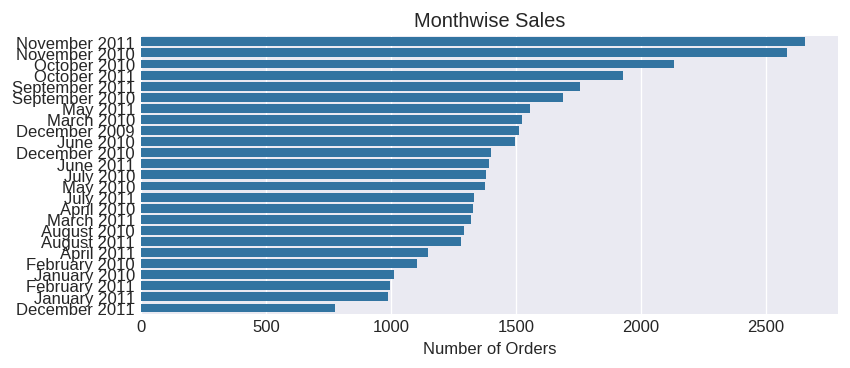

In [ ]:
## merencanakan grafik batang untuk memvisualisasikan penjualan di bulan yang berbeda
plt.subplots(figsize = (7.5, 3), dpi = 120)
ax = sns.barplot(y = busiest_month['InvoiceMonth'],
           x = busiest_month['N_Orders'])
ax.set_ylabel('')
ax.set_xlabel("Number of Orders")
plt.title("Monthwise Sales")
plt.show()

In [ ]:
## pendapatan bulan tersibuk
total_revenue_nov = busiest_month['RevenueGenerated'].iloc[0]

print(f"Highest Monthly Revenue: {busiest_month['InvoiceMonth'].iloc[0]} ({total_revenue_nov})")

print(f"Percentage of Total Revenue by {busiest_month['InvoiceMonth'].iloc[0]}: {np.round(busiest_month['RevenueGenerated'].iloc[0]*100/dataset['InvoicedPrice'].sum(),2)}%")

Highest Monthly Revenue: November 2011 (1156205.61)
Percentage of Total Revenue by November 2011: 6.65%


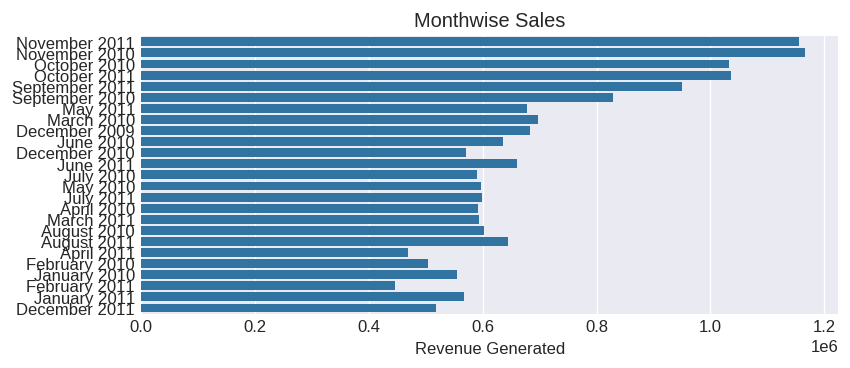

In [ ]:
## merencanakan grafik batang untuk memvisualisasikan pendapatan yang dihasilkan di bulan yang berbeda
plt.subplots(figsize = (7.5, 3), dpi = 120)
ax = sns.barplot(x = busiest_month['RevenueGenerated'],
                 y = busiest_month['InvoiceMonth'])
ax.set_ylabel('')
ax.set_xlabel("Revenue Generated")
plt.title("Monthwise Sales")
plt.show()

Pada bulan tersibuk yakni November 2011, mari kita lihat negara mana yang memberikan kontribusi penjualan paling besar.

In [ ]:
## 5 negara teratas yang memberikan kontribusi pendapatan terbanyak pada bulan November'11
dataset[dataset['InvoiceDate'].dt.to_period('M') == pd.Period('2011-11', freq='M')].groupby('Country').agg({'InvoicedPrice':'sum'}).reset_index().rename({"InvoicedPrice":"Total_Revenue"}, axis=1).sort_values('Total_Revenue', ascending=False).reset_index(drop=True).head(5)

,Country,Total_Revenue
0,United Kingdom,975251.39
1,France,31274.75
2,EIRE,29448.41
3,Germany,27967.68
4,Netherlands,25874.01


5 negara teratas yang mendorong PENDAPATAN BULANAN TERTINGGI pada bulan November 2011.

In [ ]:
## 5 negara teratas yang menyumbang pesanan terbanyak di bulan November'11
dataset[dataset['InvoiceDate'].dt.to_period('M') == pd.Period('2011-11', freq='M')].groupby('Country').agg({'Invoice':'nunique'}).reset_index().rename({"Invoice":"N_Orders"}, axis=1).sort_values('N_Orders', ascending=False).reset_index(drop=True).head(5)

,Country,N_Orders
0,United Kingdom,2387
1,Germany,68
2,France,62
3,EIRE,39
4,Netherlands,15


5 negara teratas dengan JUMLAH PESANAN BULANAN TERTINGGI pada bulan November 2011.

In [ ]:
## mengambil jumlah total pesanan yang dibuat pada bulan November 2011
dataset[dataset['InvoiceDate'].dt.to_period('M') == pd.Period('2011-11', freq='M')].groupby('Country').agg({'Invoice':'nunique'}).reset_index().rename({"Invoice":"N_Orders"}, axis=1).sort_values('N_Orders', ascending=False)['N_Orders'].sum()

2658

In [ ]:
## Jumlah pesanan yang diterima dari Inggris pada 11 November -> 2387
## Jumlah total pesanan pada 11 November -> 2698
np.round(2387*100/2658, 2)

89.8

pengamatan:

Jumlah Pesanan mencapai puncaknya pada bulan November 2011.
November 2011 merupakan BULAN TERsibuk pada periode tersebut.
Selain itu, November 2011 menghasilkan PENDAPATAN BULANAN TERTINGGI untuk bisnis pada periode tertentu.
Mengapa penjualan melonjak pada November 2011?
Pada November 2011, hampir 90% pesanan berasal dari Britania Raya (UK).
Karena bulan November adalah bulan menjelang Natal, salah satu alasan yang masuk akal mungkin adalah para pelanggan yang berbelanja menjelang hari raya.
Alasan lain mengapa penjualan melonjak pada bulan November 2011 adalah adanya PENJUALAN di situs web. Kami akan memeriksa apakah itu yang terjadi dalam proses EDA selanjutnya.


**6.5.5. Periksa untuk DIJUAL (pada Nov'11)**

saya akan memeriksa apakah ada SALE yang terjadi pada November-2011

In [ ]:
## jumlah kombinasi unik `StockCode` dan `Price`
dataset[['StockCode', 'Price']].drop_duplicates()

,StockCode,Price
0,85048,6.95
2,85048,7.95
437,79323P,6.75
439,79323P,5.45
467,79323P,5.95
...,...,...
779444,23562,2.89
779475,23562,2.49
779481,23561,2.89
779491,23561,2.49


In [ ]:
## number of unique products
dataset.StockCode.nunique()

4631

Kita dapat melihat bahwa ada nilai Price yang berbeda untuk setiap StockCode tertentu. Hal ini merupakan fenomena umum dimana harga suatu produk terus berfluktuasi dari waktu ke waktu.

In [ ]:
## membuat kerangka data terpisah dengan rata-rata Price untuk produk yang dijual pada bulan November 2011
nov_price = dataset[(dataset['InvoiceDate'].dt.to_period("M") == pd.Period("2011-11", freq="M"))].groupby("StockCode").agg({'Price':'mean'}).reset_index().rename({'Price':'Nov_Price'}, axis = 1)

In [ ]:
## membuat kerangka data terpisah dengan rata-rata Price untuk produk yang dijual di sisa waktu operasional
rest_price = dataset[~(dataset['InvoiceDate'].dt.to_period("M") == pd.Period("2011-11", freq="M"))].groupby("StockCode").agg({'Price':'mean'}).reset_index().rename({'Price':'Rest_Price'}, axis = 1)

In [ ]:
print(f"Number of Products NOT sold in Nov-2011: {dataset['StockCode'].nunique() - nov_price.StockCode.nunique()}")

Number of Products NOT sold in Nov-2011: 1936


In [ ]:
print(f"Number of Products ONLY sold in Nov-2011: {len([item for item in nov_price['StockCode'].to_list() if item not in rest_price['StockCode'].to_list()])}")

Number of Products ONLY sold in Nov-2011: 3


Kita harus menggabungkan DataFrame di atas menggunakan INNER join karena ada 1936 produk yang TIDAK terjual di bulan November'11 dan 3 produk yang HANYA dijual di bulan November'11.

In [ ]:
## membuat kerangka data untuk menggabungkan rata-rata Harga Satuan pada 11 November dan sisa periode operasi untuk membandingkan Price di seluruh produk
check_sale = rest_price.merge(nov_price, how='inner', on='StockCode')

In [ ]:
## membulatkan nilainya menjadi 2 tempat desimal
check_sale['Rest_Price'] = np.round(check_sale['Rest_Price'], 2)
check_sale['Nov_Price'] = np.round(check_sale['Nov_Price'], 2)

In [ ]:
## membuat kolom baru untuk mengukur perbedaan harga
check_sale['Price_diff'] = check_sale['Rest_Price'] - check_sale['Nov_Price']

In [ ]:
## mengambil kepala kerangka data yang baru dibuat
check_sale.head()

,StockCode,Rest_Price,Nov_Price,Price_diff
0,10080,0.54,0.39,0.15
1,10120,0.21,0.21,0.00
2,10124A,0.42,0.42,0.00
3,10124G,0.42,0.42,0.00
4,10125,0.82,0.85,-0.03


In [ ]:
## memeriksa bentuk kerangka data terbaru
check_sale.shape

(2692, 4)

Catatan: Meskipun memiliki 4631 produk unik yang terjual antara Des'09 - Des'11, kami hanya dapat membandingkan perbedaan rata-rata Harga Satuan untuk 2692 produk karena seperti yang dibahas sebelumnya, kami hanya memiliki 2692 produk yang dijual pada bulan Nov'11 dan Nov'11. sisa periode operasional.

Kami telah mengurangkan Harga Satuan rata-rata produk untuk sisa tahun ini dari harga yang sama pada bulan November 2011. Jika ada SALE yang sedang berlangsung pada bulan November 2011, kita akan melihat penurunan Harga Satuan produk karena itulah arti SALE.
Poin Penting:

Nilai negatif pada Price_diff menunjukkan bahwa rata-rata Price produk tertentu LEBIH TINGGI dibandingkan harga yang sama selama sisa waktu operasional.
Sebaliknya, nilai positif pada Price_diff menunjukkan bahwa rata-rata Price produk tertentu LEBIH RENDAH dibandingkan harga yang sama selama sisa waktu operasional.
Jika kita berhasil menemukan cukup banyak contoh skenario 2, kita dapat menyimpulkan bahwa ada PENJUALAN yang sedang berlangsung pada bulan November 2011 dan salah satu alasan yang masuk akal untuk melonjaknya penjualan pada bulan November 2011 adalah hal ini.

In [ ]:
## memeriksa statistik deskriptif untuk kolom `Perbedaan_Harga`
check_sale['Price_diff'].describe()

count    2692.000000
mean       -0.206961
std        14.819680
min      -742.920000
25%        -0.110000
50%        -0.010000
75%         0.000000
max       178.000000
Name: Price_diff, dtype: float64

In [ ]:
## persentase produk yang dijual dengan harga LEBIH TINGGI dibandingkan sisa waktu operasional
print(f"Percentage of total products that are sold at a HIGHER price in Nov'11: {np.round(check_sale[(check_sale['Price_diff'] <= 0)].shape[0]*100/check_sale.shape[0], 2)}%")

Percentage of total products that are sold at a HIGHER price in Nov'11: 78.38%


In [ ]:
## mengambil produk yang mengalami lonjakan harga tertinggi pada 11 November
check_sale[(check_sale['Price_diff'] == check_sale['Price_diff'].min())]

,StockCode,Rest_Price,Nov_Price,Price_diff
2689,DOT,558.42,1301.34,-742.92


Pengamatan:

Hampir 78,4% produk tidak mengalami penurunan harga pada bulan November 2011.
Bahkan yang mengejutkan kami, harga rata-rata salah satu produk (StockCode == "DOT") melonjak lebih dari 100%.

In [ ]:
## Memeriksa statistik deskriptif untuk produk yang benar-benar dijual dengan harga diskon
check_sale[(check_sale['Price_diff'] > 0)]['Price_diff'].describe()

count    582.000000
mean       1.026323
std        8.068987
min        0.010000
25%        0.040000
50%        0.200000
75%        0.550000
max      178.000000
Name: Price_diff, dtype: float64

In [ ]:
## memeriksa produk mana yang mendapat potongan harga maksimum
check_sale[(check_sale['Price_diff'] == check_sale['Price_diff'].max())]

,StockCode,Rest_Price,Nov_Price,Price_diff
2690,M,223.73,45.73,178.0


In [ ]:
## memeriksa statistik harga untuk produk "M".
dataset[(dataset['StockCode'] == "M")]['Price'].describe()

count      688.000000
mean       212.600567
std        900.551375
min          0.000000
25%          0.550000
50%          1.650000
75%         15.000000
max      10953.500000
Name: Price, dtype: float64

In [ ]:
## memeriksa jumlah produk melihat potongan harga
print(f"Number of product sold at a discounted price in Nov'11: {check_sale[(check_sale['Price_diff'] > 0)].shape[0]}")

Number of product sold at a discounted price in Nov'11: 582


In [ ]:
## memeriksa persentase produk yang mengalami penurunan harga pada bulan November 2011
print(f"Percentage of products sold at a discounted price in Nov'11: {np.round(check_sale[(check_sale['Price_diff'] > 0)].shape[0]*100/check_sale.shape[0],2)}%")

Percentage of products sold at a discounted price in Nov'11: 21.62%


Pengamatan:

Hampir 79% dari seluruh produk yang dijual pada November'11 dijual dengan harga LEBIH TINGGI dibandingkan waktu operasional lainnya.
Hanya 21,6% dari seluruh produk yang dijual pada November 11 mengalami pemotongan harga.
75% produk yang dijual dengan harga LEBIH RENDAH mengalami potongan harga HANYA 0,55 pada November 11.
Pemotongan harga maksimum adalah 150,88 untuk produk dengan Kode Saham "M". Ini juga tidak cukup meyakinkan untuk menganggapnya sebagai harga JUAL. Karena seperti yang kita lihat di sini, dalam 75% kejadian, produk "M" dijual dengan harga kurang dari 15.

Kesimpulan: TIDAK ADA PENJUALAN yang sedang berlangsung pada bulan November 2011. Oleh karena itu, untuk alasan lain mengapa penjualan melonjak pada bulan November 2011, kami harus berkonsultasi dengan pakar domain.

**6.5.6. Pesanan berdasarkan Hari**

In [ ]:
## mengambil hari kerja saat bisnis menerima setidaknya satu pesanan
dataset['InvoiceDate'].dt.day_name().unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

Sepertinya bisnis ini setiap hari menerima pesanan

Q4. Hari manakah yang paling sibuk dalam seminggu?

In [ ]:
## membuat DataFrame untuk menyimpan penjualan harian dan total pendapatan
busiest_day = dataset.groupby(dataset['InvoiceDate'].dt.day_name()).agg({'Invoice':'nunique', 'InvoicedPrice':'sum'}).rename({'Invoice':'N_Orders', "InvoicedPrice":'Total_Revenue'}, axis=1)

In [ ]:
## mengurutkan kerangka data berdasarkan `Total_Revenue` dalam urutan menurun
busiest_day.sort_values(['Total_Revenue'], ascending = False)

,N_Orders,Total_Revenue
InvoiceDate,,
Thursday,7774,3745783.432
Tuesday,6628,3322830.142
Wednesday,6649,3021043.853
Monday,5755,2778201.566
Friday,5391,2728473.173
Sunday,4748,1768669.052
Saturday,30,9803.050


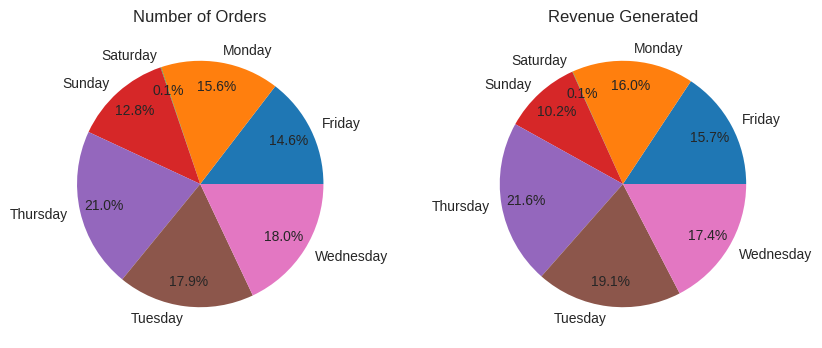

In [ ]:
## membuat diagram lingkaran
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (10,4), dpi = 100)
ax[0].pie(busiest_day['N_Orders'],
                                 labels = busiest_day.index,
                                 autopct = lambda pct: f'{pct:.1f}%',
                                 pctdistance = 0.8)
ax[0].set_title("Number of Orders")

ax[1].pie(busiest_day['Total_Revenue'],
                                 labels = busiest_day.index,
                                 autopct = lambda pct: f'{pct:.1f}%',
                                 pctdistance = 0.8)
ax[1].set_title("Revenue Generated")

# Tunjukkan diagram lingkarannya
plt.show()

Pengamatan:

Datanya HAMPIR merata di semua hari dalam seminggu.
Meskipun hari Kamis adalah hari tersibuk dalam seminggu baik dalam hal penjualan terbanyak maupun perolehan pendapatan terbanyak, hal ini tidak memiliki dampak yang signifikan terhadap bisnis secara keseluruhan.

**6.5.7. Jam sibuk**

In [ ]:
## membuat kerangka data yang menunjukkan jumlah pesanan dan total pendapatan yang dihasilkan per jam
rush_hour = dataset.groupby(dataset['InvoiceDate'].dt.hour).agg({'Invoice':'nunique', 'InvoicedPrice':'sum'}).reset_index().rename({"InvoiceDate":"InvoiceHour", 'Invoice':'N_Orders', "InvoicedPrice":'Total_Revenue'}, axis=1)

In [ ]:
## mengubah tipe InvoiceHour menjadi objek untuk menghindari kebingungan selama visualisasi
rush_hour['InvoiceHour'] = rush_hour['InvoiceHour'].astype('object')

In [ ]:
## mengambil kepala kerangka data
rush_hour.head()

,InvoiceHour,N_Orders,Total_Revenue
0,6,1,4.250
1,7,76,75745.570
2,8,979,524612.550
3,9,2549,1484450.541
4,10,4364,2320711.443


In [ ]:
## memeriksa ringkasan kerangka data terbaru
rush_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceHour    15 non-null     object 
 1   N_Orders       15 non-null     int64  
 2   Total_Revenue  15 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 488.0+ bytes


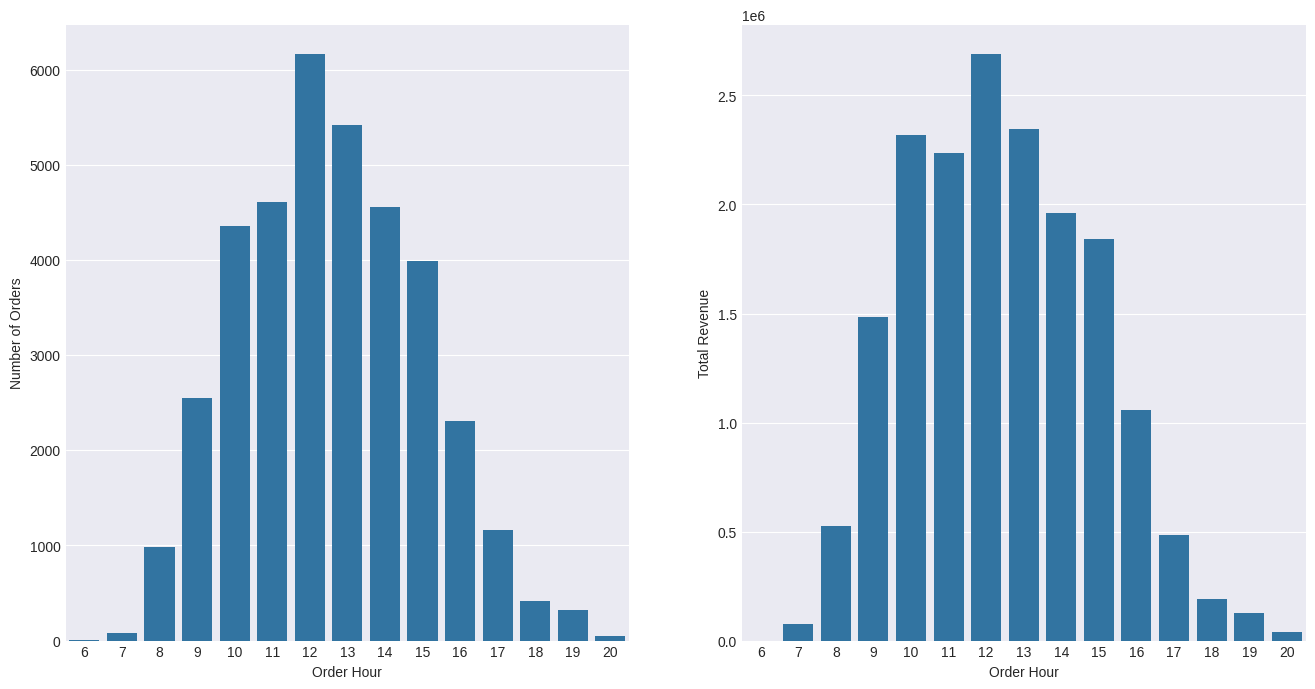

In [ ]:
## membuat dua barplot: satu untuk Jumlah Pesanan yang diterima dan satu lagi untuk Total Pendapatan yang Dihasilkan
fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize = (16,8))
g = sns.barplot(x = rush_hour['InvoiceHour'],
                y = rush_hour['N_Orders'],
                ax = axs[0])
g.set_ylabel("Number of Orders")
g.set_xlabel("Order Hour")

h = sns.barplot(x = rush_hour['InvoiceHour'],
                y = rush_hour['Total_Revenue'],
                ax = axs[1])
h.set_ylabel("Total Revenue")
h.set_xlabel("Order Hour")

plt.show()

Pengamatan:

Rupanya, RUSH HOUR adalah pukul 12.00 hingga 14.00 untuk bisnis.
Dengan informasi ini, situs web perusahaan dapat dioptimalkan dengan lebih baik untuk jangka waktu tertentu.
Selain itu, kami dapat memastikan bahwa perusahaan menghindari pemeliharaan rutin selama Jam Sibuk.
Dengan begitu, rasio pentalan pelanggan dapat diminimalkan.

**6.6. Menganalisis Negara**

In [ ]:
## mengambil jumlah negara unik tempat bisnis mengirimkan produknya
dataset['Country'].nunique()

41

In [ ]:
## membuat kerangka data yang berisi penjualan berdasarkan negara dan pendapatan penjualan untuk analisis lebih lanjut
country_wise = dataset.groupby('Country').agg({"Invoice":"nunique", "InvoicedPrice":'sum'}).sort_values(by='InvoicedPrice', ascending = False).reset_index().rename({"Invoice":"N_Orders", "InvoicedPrice":'Total_Revenue'}, axis = 1)

In [ ]:
## membuat kolom untuk menunjukkan persentase pesanan
country_wise['%_N_Orders'] = np.round(country_wise['N_Orders']*100/country_wise['N_Orders'].sum(),2)

In [ ]:
## membuat kolom untuk menunjukkan persentase pendapatan
country_wise['%_Total_Revenue'] = np.round(country_wise['Total_Revenue']*100/country_wise['Total_Revenue'].sum(),2)

In [ ]:
## mengambil kepala kerangka data Negara
country_wise.head()

,Country,N_Orders,Total_Revenue,%_N_Orders,%_Total_Revenue
0,United Kingdom,33546,1.438923e+07,90.73,82.82
1,EIRE,567,6.165705e+05,1.53,3.55
2,Netherlands,229,5.540381e+05,0.62,3.19
3,Germany,789,4.250197e+05,2.13,2.45
4,France,614,3.487690e+05,1.66,2.01


**6.6.1. 5 Negara Teratas**

In [ ]:
## mengambil 5 negara teratas yang menyumbang pendapatan terbanyak
country_wise.sort_values(['Total_Revenue'], ascending = False).head()

,Country,N_Orders,Total_Revenue,%_N_Orders,%_Total_Revenue
0,United Kingdom,33546,1.438923e+07,90.73,82.82
1,EIRE,567,6.165705e+05,1.53,3.55
2,Netherlands,229,5.540381e+05,0.62,3.19
3,Germany,789,4.250197e+05,2.13,2.45
4,France,614,3.487690e+05,1.66,2.01


In [ ]:
## mengambil 5 negara teratas yang berkontribusi terhadap sebagian besar pesanan
country_wise.sort_values(['N_Orders'], ascending = False).head()

,Country,N_Orders,Total_Revenue,%_N_Orders,%_Total_Revenue
0,United Kingdom,33546,1.438923e+07,90.73,82.82
3,Germany,789,4.250197e+05,2.13,2.45
4,France,614,3.487690e+05,1.66,2.01
1,EIRE,567,6.165705e+05,1.53,3.55
2,Netherlands,229,5.540381e+05,0.62,3.19


Pengamatan:

Toko online_retail_II melayani di 41 negara.
Bisnis ini sebagian besar hadir di Britania Raya (UK).
Britania Raya (UK) mendorong hampir 100% penjualan dan 82% pendapatan penjualan.
Produk terlaris di 5 Negara Teratas dibahas di sini.

**6.7. Menganalisis ID Pelanggan**

In [ ]:
## jumlah total pelanggan unik yang diperoleh bisnis
dataset['Customer ID'].nunique()

5881

**6.7.1. 5 Pelanggan Paling Berharga Teratas**

In [ ]:
## mengambil 5 pelanggan teratas berdasarkan total pendapatan yang dihasilkan bisnis dari mereka
dataset.groupby('Customer ID').agg({'InvoicedPrice':'sum'}).sort_values('InvoicedPrice', ascending = False).reset_index().rename({"InvoicedPrice":"Total_Revenue"}, axis = 1).head()

,Customer ID,Total_Revenue
0,18102,580987.04
1,14646,528602.52
2,14156,313437.62
3,14911,291420.81
4,17450,244784.25


**6.7.2. Rata-rata Menghabiskan**

In [ ]:
## mengambil statistik deskriptif untuk memahami pengeluaran pelanggan
dataset.groupby("Invoice").agg({'InvoicedPrice':'sum'}).reset_index().rename({'InvoicedPrice':'TotalSpent'}, axis=1)['TotalSpent'].describe()

count     36975.000000
mean        469.906809
std        1359.644775
min           0.000000
25%         157.880000
50%         303.030000
75%         477.200000
max      168469.600000
Name: TotalSpent, dtype: float64

In [ ]:
## memeriksa ketimpangan distribusi total pengeluaran pelanggan
dataset.groupby("Invoice").agg({'InvoicedPrice':'sum'}).reset_index().rename({'InvoicedPrice':'TotalSpent'}, axis=1)['TotalSpent'].skew()

61.28258432229569

Pengamatan:

75% pelanggan menghabiskan kurang dari £477.
Pengeluaran Pelanggan Tertinggi: £168.469
Karena distribusinya sangat condong ke kanan, dapat dikatakan bahwa sebagian besar pelanggan di platform ini menghabiskan kurang dari £303.

**7.0. Analisis Kelompok**


Analisis kelompok adalah teknik analisis strategis yang digunakan oleh bisnis, termasuk toko online_retail_II, untuk mendapatkan wawasan lebih mendalam tentang perilaku pelanggan, retensi, dan kinerja bisnis secara keseluruhan. Ini melibatkan pengelompokan pelanggan ke dalam kelompok berdasarkan karakteristik atau tindakan bersama dan menganalisis perilaku mereka dari waktu ke waktu.

Formasi Kelompok: Pelanggan dikelompokkan ke dalam kelompok berdasarkan karakteristik atau tindakan umum, seperti bulan mereka melakukan pembelian pertama, saluran pemasaran yang mereka lalui, atau profil demografis mereka.

Analisis Perilaku: Kelompok kemudian dianalisis untuk memahami bagaimana kelompok pelanggan yang berbeda berperilaku dari waktu ke waktu. Analisis ini dapat mengungkapkan tren tingkat retensi, frekuensi pembelian, nilai pesanan rata-rata, dan nilai seumur hidup pelanggan (CLV).

Segmentasi dan Personalisasi: Wawasan dari analisis kelompok memungkinkan bisnis untuk mensegmentasi pelanggan secara lebih efektif dan mempersonalisasi pemasaran, penawaran produk, dan strategi komunikasi berdasarkan karakteristik kelompok dan pola perilaku tertentu.


In [ ]:
## mengambil jumlah total pelanggan unik
dataset['Customer ID'].nunique()

5881

Pengamatan:

Bisnis ini berhasil memperoleh 5881 pelanggan unik selama rentang waktu 25 bulan.
Sekarang, kami harus mempertimbangkan retensi pelanggan setiap bulan.
Oleh karena itu, kami akan membuat Matriks Retensi untuk Analisis Kelompok tentang Retensi Pelanggan.

**7.1. Retention Matrix**

In [ ]:
## membuat kolom baru dengan hanya mengekstrak bulan invoice dari InvoiceDate
dataset['InvoiceMonth'] = dataset['InvoiceDate'].dt.to_period("M")

In [ ]:
## membuat kolom baru untuk mengidentifikasi bulan pertama kali pelanggan diperoleh
dataset['CohortMonth'] = dataset.groupby('Customer ID')['InvoiceMonth'].transform('min')

In [ ]:
## membuat indeks berdasarkan bulan pelanggan aktif di platform
dataset['CohortIndex'] = (dataset['InvoiceMonth'] - dataset['CohortMonth']).apply(attrgetter('n'))

## mengambil kepala
dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoicedPrice,InvoiceMonth,CohortMonth,CohortIndex
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009-12,2009-12,0
1,489559,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 12:55:00,6.95,17056,United Kingdom,83.40,2009-12,2009-12,0
2,489576,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,5,2009-12-01 13:38:00,7.95,15984,United Kingdom,39.75,2009-12,2009-12,0
3,489582,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2,2009-12-01 13:47:00,7.95,14543,United Kingdom,15.90,2009-12,2009-12,0
4,489656,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 17:28:00,6.95,17428,United Kingdom,83.40,2009-12,2009-12,0


In [ ]:
# membuat DataFrame baru yang memisahkan pelanggan berdasarkan bulan perolehannya dan jumlah bulan aktifnya
cohort_data = dataset.groupby(['CohortMonth','CohortIndex'])['Customer ID'].nunique().reset_index().rename({'Customer ID':'N_Customers'}, axis = 1)

## mengambil kepala
cohort_data.head()

,CohortMonth,CohortIndex,N_Customers
0,2009-12,0,955
1,2009-12,1,337
2,2009-12,2,319
3,2009-12,3,406
4,2009-12,4,363


In [ ]:
## memutar data untuk menyiapkan matriks retensi yang memiliki CohortIndex sebagai kolom
cohort_table = cohort_data.pivot_table(columns = "CohortIndex", index="CohortMonth", values = "N_Customers")

## mengambil tabel yang baru dibuat
cohort_table

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,...,289.0,251.0,289.0,270.0,248.0,244.0,301.0,291.0,389.0,188.0
2010-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,...,58.0,90.0,76.0,71.0,75.0,93.0,74.0,94.0,22.0,NaN
2010-02,376.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,...,75.0,60.0,61.0,54.0,86.0,86.0,61.0,22.0,NaN,NaN
2010-03,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,48.0,...,75.0,77.0,69.0,78.0,89.0,94.0,35.0,NaN,NaN,NaN
2010-04,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,31.0,32.0,...,46.0,41.0,44.0,53.0,66.0,17.0,NaN,NaN,NaN,NaN
2010-05,254.0,40.0,43.0,44.0,45.0,65.0,54.0,32.0,15.0,21.0,...,32.0,35.0,42.0,39.0,12.0,NaN,NaN,NaN,NaN,NaN
2010-06,270.0,47.0,51.0,55.0,62.0,77.0,34.0,24.0,22.0,32.0,...,33.0,36.0,55.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,186.0,29.0,34.0,55.0,54.0,26.0,21.0,27.0,27.0,21.0,...,32.0,44.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,162.0,33.0,48.0,52.0,28.0,19.0,16.0,20.0,22.0,21.0,...,32.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## mengatur ukuran kelompok
cohort_size = cohort_table.iloc[:, 0]

In [ ]:
## membuat matriks retensi
retention_matrix = cohort_table.divide(cohort_size, axis=0)

## menunjukkan matriks
retention_matrix

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12,1.0,0.352880,0.334031,0.425131,0.380105,0.359162,0.376963,0.342408,0.336126,0.362304,...,0.302618,0.262827,0.302618,0.282723,0.259686,0.255497,0.315183,0.304712,0.407330,0.196859
2010-01,1.0,0.206266,0.310705,0.305483,0.263708,0.300261,0.258486,0.229765,0.279373,0.318538,...,0.151436,0.234987,0.198433,0.185379,0.195822,0.242820,0.193211,0.245431,0.057441,NaN
2010-02,1.0,0.236702,0.223404,0.289894,0.244681,0.199468,0.191489,0.284574,0.252660,0.273936,...,0.199468,0.159574,0.162234,0.143617,0.228723,0.228723,0.162234,0.058511,NaN,NaN
2010-03,1.0,0.189616,0.230248,0.241535,0.232506,0.203160,0.246050,0.302483,0.275395,0.108352,...,0.169300,0.173815,0.155756,0.176072,0.200903,0.212190,0.079007,NaN,NaN,NaN
2010-04,1.0,0.193878,0.193878,0.163265,0.183673,0.224490,0.275510,0.261905,0.105442,0.108844,...,0.156463,0.139456,0.149660,0.180272,0.224490,0.057823,NaN,NaN,NaN,NaN
2010-05,1.0,0.157480,0.169291,0.173228,0.177165,0.255906,0.212598,0.125984,0.059055,0.082677,...,0.125984,0.137795,0.165354,0.153543,0.047244,NaN,NaN,NaN,NaN,NaN
2010-06,1.0,0.174074,0.188889,0.203704,0.229630,0.285185,0.125926,0.088889,0.081481,0.118519,...,0.122222,0.133333,0.203704,0.051852,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,1.0,0.155914,0.182796,0.295699,0.290323,0.139785,0.112903,0.145161,0.145161,0.112903,...,0.172043,0.236559,0.080645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.0,0.203704,0.296296,0.320988,0.172840,0.117284,0.098765,0.123457,0.135802,0.129630,...,0.197531,0.067901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## mengatur cohort_size ke format yang dapat dibaca
cohort_size.index = cohort_size.index.strftime('%B %Y')

**7.2. Peta Panas Analisis Kelompok**

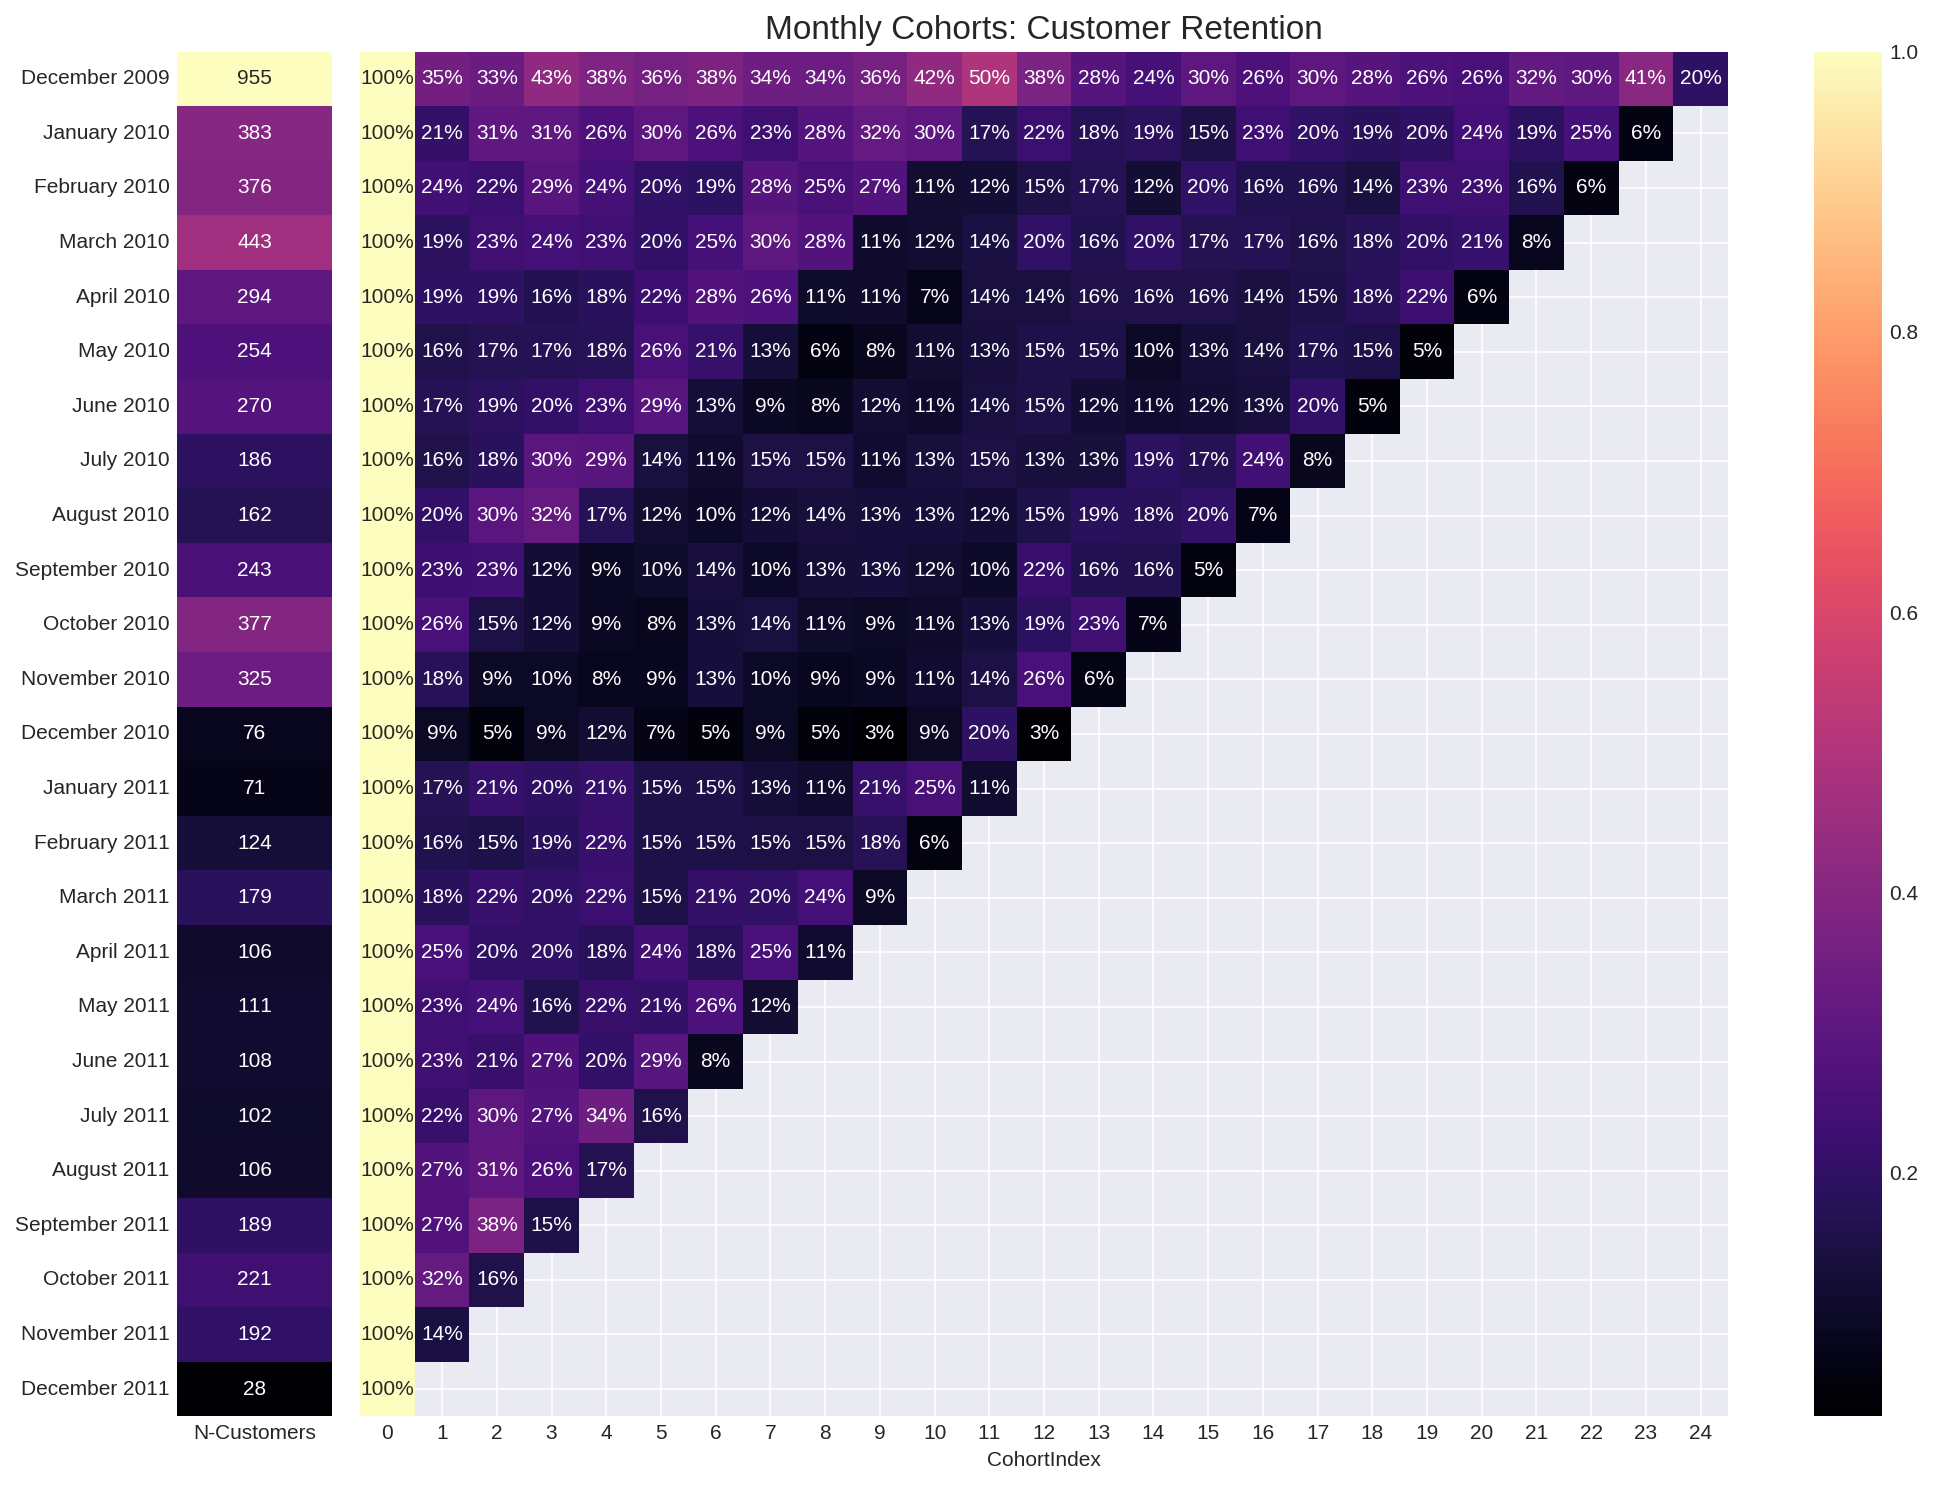

In [ ]:
## merencanakan peta panas kelompok
fig, ax = plt.subplots(1, 2, figsize=(14, 10), sharey=True, gridspec_kw={'width_ratios': [1, 11]}, dpi = 150)

# matriks retensi
sns.heatmap(retention_matrix,
            mask = retention_matrix.isnull(),
            annot = True,
            fmt = '.0%',
            cmap = sns.color_palette("magma", as_cmap=True),
            ax = ax[1])
ax[1].set_title('Monthly Cohorts: Customer Retention', fontsize=16)
ax[1].set(ylabel = '')

# ukuran kelompok
cohort_size_df = pd.DataFrame(cohort_size).rename(columns = {0: 'N-Customers'})
sns.heatmap(cohort_size_df,
            annot = True,
            cbar = False,
            fmt = 'g',
            ax = ax[0],
            cmap = sns.color_palette("magma", as_cmap=True))
ax[0].set(ylabel = '')

fig.tight_layout()

Manfaat Analisis Kelompok:
Selain pemasaran, analisis kelompok menawarkan beberapa manfaat strategis untuk bisnis ritel online:

Strategi Retensi: Mengidentifikasi kelompok dengan tingkat retensi tinggi memungkinkan bisnis mengembangkan strategi retensi yang ditargetkan, seperti program loyalitas, penawaran yang dipersonalisasi, dan kampanye keterlibatan kembali, untuk memaksimalkan nilai seumur hidup pelanggan dan mengurangi churn.

Wawasan Produk: Menganalisis perilaku kelompok dapat memberikan wawasan berharga tentang kinerja produk, adopsi fitur, dan preferensi pelanggan, memandu pengembangan produk, strategi penetapan harga, dan keputusan manajemen inventaris.

Pengoptimalan Operasional: Analisis kelompok dapat menginformasikan keputusan operasional, seperti alokasi sumber daya, prioritas dukungan pelanggan, dan manajemen rantai pasokan, untuk meningkatkan efisiensi dan kepuasan pelanggan.

Dengan memanfaatkan analisis kelompok, toko ritel online dapat mengambil keputusan berdasarkan data, meningkatkan pengalaman pelanggan, mendorong loyalitas jangka panjang, dan mengoptimalkan proses bisnis untuk pertumbuhan berkelanjutan dan daya saing.


**8.0. Analisis RFM**

Analisis RFM adalah pendekatan strategis yang digunakan oleh bisnis, termasuk toko online_retail_II, untuk mendapatkan wawasan mendalam tentang perilaku pelanggan dan mengoptimalkan berbagai aspek operasi. Akronim RFM adalah singkatan dari Recency, Frekuensi, dan Nilai Moneter, yang merupakan metrik dasar yang digunakan untuk menilai keterlibatan pelanggan, loyalitas, dan nilai bagi bisnis.

Recency (R): Faktor ini mengevaluasi seberapa baru pelanggan berinteraksi atau bertransaksi dengan bisnis. Ini membantu mengidentifikasi pelanggan yang aktif dan terlibat versus mereka yang mungkin memerlukan strategi keterlibatan kembali.

Frekuensi (F): Frekuensi mengukur seberapa sering pelanggan terlibat dengan bisnis dalam jangka waktu tertentu. Ini menunjukkan loyalitas pelanggan, pembelian berulang, dan potensi perolehan pendapatan berkelanjutan.

Nilai Moneter (M): Nilai moneter mencerminkan jumlah total uang yang dibelanjakan pelanggan untuk produk atau layanan. Laporan ini menyoroti pelanggan bernilai tinggi yang memberikan kontribusi signifikan terhadap pendapatan dan laba lanskap ritel.

In [ ]:
## membuat kerangka data terpisah yang mengumpulkan informasi pelanggan seperti tanggal terakhir pemesanan, total pesanan, dan jumlah total yang dibelanjakan
customers = dataset.groupby("Customer ID").agg({'InvoiceDate':'max', 'Invoice': 'count', 'InvoicedPrice': 'sum'}).reset_index().rename(columns = {'InvoiceDate': 'LastOrderOn', 'Invoice':'N_Orders', 'InvoicedPrice': 'TotalSpent'})

In [ ]:
## Misalkan analisis dilakukan pada hari setelah pemesanan terakhir dilakukan
analysis_date = customers['LastOrderOn'].max() + pd.Timedelta(days=1)

In [ ]:
## membuat kolom baru yang menghitung jumlah hari sejak pengguna melakukan pemesanan terakhir
customers['LastOrderSince'] = (analysis_date - customers['LastOrderOn']).dt.days

In [ ]:
## mengambil statistik deskriptif untuk kolom numerik kerangka data pelanggan
customers.describe(exclude = ['datetime64', 'object']).transpose()

,count,mean,std,min,25%,50%,75%,max
N_Orders,5881.0,132.544635,342.153047,1.0,20.0,52.0,138.00,12435.00
TotalSpent,5881.0,2954.396237,14437.322635,0.0,341.9,865.6,2247.72,580987.04
LastOrderSince,5881.0,201.457745,209.474135,1.0,26.0,96.0,380.00,739.00


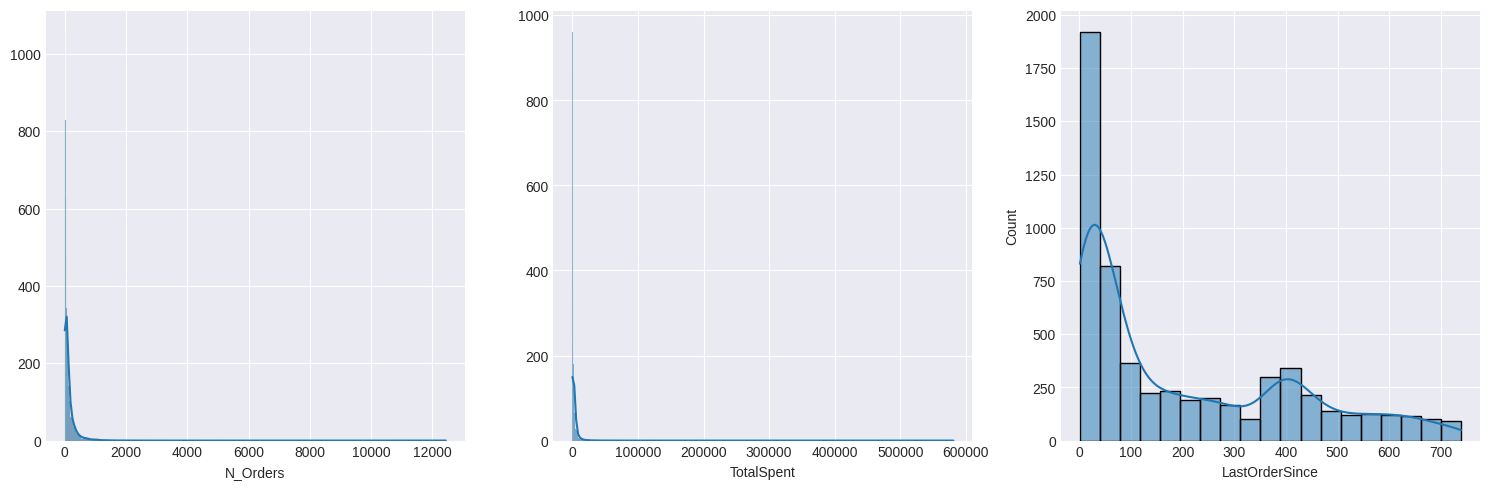

In [ ]:
## membuat tiga histogram untuk memahami distribusi yang mendasarinya
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

## for N_Orders
sns.histplot(data = customers, x = 'N_Orders', kde = True, ax = axs[0])
axs[0].set_ylabel('')

## for TotalSpent
sns.histplot(data = customers, x = 'TotalSpent', kde = True, ax = axs[1])
axs[1].set_ylabel('')

## for LastOrderSince
sns.histplot(data = customers, x = 'LastOrderSince', kde = True, ax = axs[2])
axs[0].set_ylabel('')

## adjusting layout
plt.tight_layout()
plt.show()

In [ ]:
for col in customers.drop(['Customer ID', 'LastOrderOn'], axis = 1).columns:
    print(f"Skewness for {col}: {np.round(customers[col].skew(),2)}")

Skewness for N_Orders: 18.17
Skewness for TotalSpent: 25.08
Skewness for LastOrderSince: 0.89


Catatan: Ketiga kolom tersebut miring ke kanan.

Rencana Aksi:

Kami akan mengelompokkan setiap kolom berdasarkan nilai kuantil untuk menetapkan skor untuk Keterkinian(R), Frekuensi(F), dan Moneter(M).
Kami akan mengumpulkan skor ini untuk Segmentasi Pelanggan.

In [ ]:
## untuk perhitungan R, F dan M dari kolom
def calculateScore(value, col, reverse = False):
    if value <= customers[col].quantile(0.1):
        return 1 if not reverse else 10
    elif value <= customers[col].quantile(0.2):
        return 2 if not reverse else 9
    elif value <= customers[col].quantile(0.3):
        return 3 if not reverse else 8
    elif value <= customers[col].quantile(0.4):
        return 4 if not reverse else 7
    elif value <= customers[col].quantile(0.5):
        return 5 if not reverse else 6
    elif value <= customers[col].quantile(0.6):
        return 6 if not reverse else 5
    elif value <= customers[col].quantile(0.7):
        return 7 if not reverse else 4
    elif value <= customers[col].quantile(0.8):
        return 8 if not reverse else 3
    elif value <= customers[col].quantile(0.9):
        return 9 if not reverse else 2
    else:
        return 10 if not reverse else 1

In [ ]:
## menghitung R
customers['R'] = customers['LastOrderSince'].apply(calculateScore, col = 'LastOrderSince', reverse = True)

In [ ]:
## menghitung F
customers['F'] = customers['N_Orders'].apply(calculateScore, col = 'N_Orders', reverse = False)

In [ ]:
## menghitung M
customers['M'] = customers['TotalSpent'].apply(calculateScore, col = 'TotalSpent', reverse = False)

In [ ]:
## menjumlahkan ketiganya untuk mendapatkan skor RFM
customers['RFM_Score'] = customers['R'] + customers['F'] + customers['M']

In [ ]:
## mengambil statistik deskriptif untuk RFM_score
customers['RFM_Score'].describe()

count    5881.000000
mean       16.502806
std         7.415536
min         3.000000
25%        10.000000
50%        16.000000
75%        23.000000
max        30.000000
Name: RFM_Score, dtype: float64

In [ ]:
## membuat bin berdasarkan nilai persentil
bins = [0, customers['RFM_Score'].quantile(1/3), customers['RFM_Score'].quantile(2/3), customers['RFM_Score'].max()]

## mendefinisikan label untuk tingkatan
labels = ['Tier-III', 'Tier-II', 'Tier-I']

## adding a new column 'RFM_Tier' with the tier labels based on binning
customers['RFM_Tier'] = pd.cut(customers['RFM_Score'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
## menggabungkan data dengan RFM_Tier
np.round(customers.groupby('RFM_Tier').agg({'Customer ID': 'count',
                                            'LastOrderSince': 'mean',
                                            'TotalSpent':'mean',
                                            'N_Orders': 'mean',}).rename({'Customer ID': '#Customers',
                                                                          'LastOrderSince': 'AvgInActiveDays',
                                                                          'N_Orders': '#AvgOrders',
                                                                          'TotalSpent':'AvgSpent', }), 2).sort_index()

,Customer ID,LastOrderSince,TotalSpent,N_Orders
RFM_Tier,,,,
Tier-I,1737,35.65,7845.63,343.38
Tier-II,2146,161.65,1442.61,68.02
Tier-III,1998,388.36,325.88,18.56


Manfaat Analisis RFM:
Dengan menggabungkan faktor-faktor ini (R, F, dan M), bisnis dapat menciptakan segmen pelanggan yang berbeda dan menyesuaikan strategi di luar pemasaran, seperti:

Efisiensi Operasional: Mengidentifikasi pelanggan dengan frekuensi tinggi dapat menginformasikan manajemen inventaris, alokasi sumber daya, dan prioritas layanan untuk meningkatkan efisiensi operasional dan kepuasan pelanggan.

Pengalaman Pelanggan: Memahami perilaku pembelian berbagai segmen memungkinkan pengalaman yang dipersonalisasi, promosi yang ditargetkan, dan peningkatan dukungan pelanggan, sehingga meningkatkan kepuasan dan loyalitas secara keseluruhan.

Pengembangan Produk: Menganalisis pola dan preferensi pembelian dapat memandu pengembangan produk, strategi penetapan harga, dan inisiatif penjualan silang untuk memenuhi kebutuhan pelanggan yang terus berkembang secara efektif.

Oleh karena itu, analisis RFM berfungsi sebagai alat yang ampuh untuk pengambilan keputusan berdasarkan data di berbagai fungsi bisnis, mendorong pertumbuhan, retensi, dan daya saing dalam lanskap ritel online yang dinamis.

**9.0. Segmentasi Pelanggan - Pengelompokan**

In [ ]:
## mempersiapkan masukan untuk kerangka data model saya
X = customers.drop(['Customer ID','LastOrderOn', 'R', 'F', 'M', 'RFM_Score', 'RFM_Tier'], axis=1)

In [ ]:
## scaling X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
## creating a list to score ineria scores
wcss = []

## creating a list to score silhouette scores
sil_scores = []

for k in range(3, 11, 1):
    model = KMeans(n_clusters=k, random_state=101)
    pred = model.fit_predict(X_scaled)
    wcss.append(model.inertia_)
    sil_scores.append(silhouette_score(X_scaled, pred))

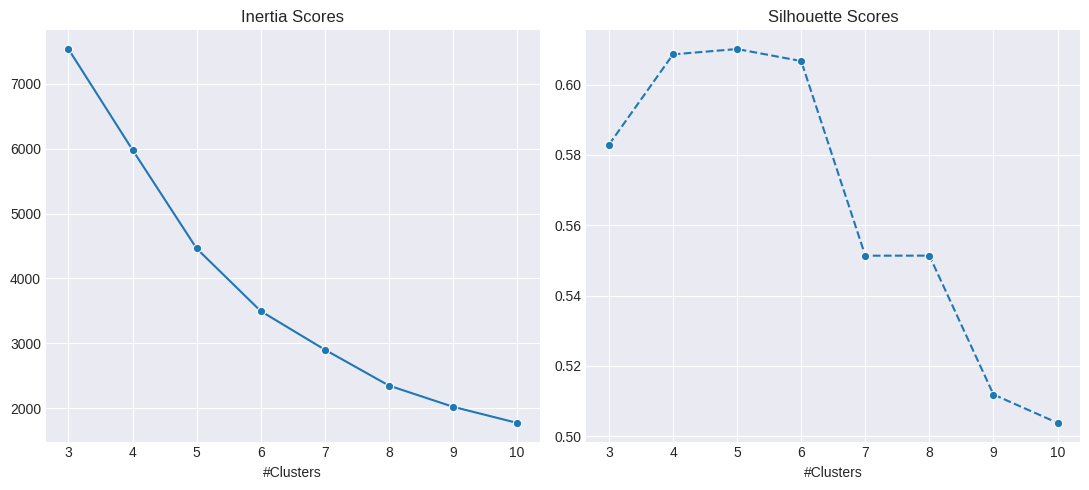

In [ ]:
## membuat dua plot garis: satu untuk inersia dan yang lainnya untuk skor siluet
fig, axs = plt.subplots(1, 2, figsize = (11, 5))

## for inertia
sns.lineplot(x = list(range(3, 11, 1)), y = wcss, marker = "o", ax = axs[0])
axs[0].set_title('Inertia Scores')
axs[0].set_xlabel('#Clusters')
axs[0].set_xticks(list(range(3, 11, 1)))
axs[0].set_xticklabels(list(range(3, 11, 1)))

## for silhouette score
sns.lineplot(x = list(range(3, 11, 1)), y = sil_scores, marker = "o", ax = axs[1], linestyle = "--");
axs[1].set_title('Silhouette Scores')
axs[1].set_xlabel('#Clusters')
axs[1].set_xticks(list(range(3, 11, 1)))
axs[1].set_xticklabels(list(range(3, 11, 1)))

## adjusting layout
plt.tight_layout()
plt.show()

Dari plot garis tersebut dapat disimpulkan bahwa k = 5 merupakan nilai yang paling tepat. Oleh karena itu, kami akan membangun model akhir untuk 5 cluster.

In [ ]:
## membuat model akhir untuk k = 5
final_model = KMeans(n_clusters=5, random_state = 101)

In [ ]:
## mengambil prediksi
clusters = final_model.fit_predict(X_scaled)

In [ ]:
## membuat kolom baru untuk menugaskan cluster
customers['Cluster'] = clusters

In [ ]:
## mengambil kepala kerangka data
customers.head()

,Customer ID,LastOrderOn,N_Orders,TotalSpent,LastOrderSince,R,F,M,RFM_Score,RFM_Tier,Cluster
0,12346,2011-01-18 10:01:00,34,77556.46,326,3,4,10,17,Tier-II,0
1,12347,2011-12-07 15:52:00,222,4921.53,2,10,9,9,28,Tier-I,3
2,12348,2011-09-25 13:13:00,51,2019.40,75,6,5,8,19,Tier-II,3
3,12349,2011-11-21 09:51:00,175,4428.69,19,9,9,9,27,Tier-I,3
4,12350,2011-02-02 16:01:00,17,334.40,310,4,3,3,10,Tier-III,1


In [ ]:
## mengambil semua cluster unik
customers['Cluster'].unique()

array([0, 3, 1, 4, 2], dtype=int32)

In [ ]:
## menggabungkan data berdasarkan cluster
clusterDF = customers[['Cluster', 'Customer ID', 'N_Orders', 'TotalSpent', 'LastOrderSince', 'RFM_Score']]

In [ ]:
## dikumpulkan berdasarkan cluster
np.round(clusterDF.groupby('Cluster').agg({'Customer ID':'count',
                                  'N_Orders':'mean',
                                  'TotalSpent': 'mean',
                                  'LastOrderSince': 'mean',
                                  'RFM_Score': 'mean'}).sort_values('TotalSpent', ascending = False),2).rename({'Customer ID':'#Customers',
                                                                                            'N_Orders': 'AvgOrders',
                                                                                             'TotalSpent':'AvgSpent',
                                                                                            'LastOrderSince': 'AvgInactiveDays',
                                                                                            'RFM_Score': 'Avg_RFM_Score'}, axis=1)

,#Customers,AvgOrders,AvgSpent,AvgInactiveDays,Avg_RFM_Score
Cluster,,,,,
2,4,2338.25,416952.86,5.25,29.75
4,6,7646.17,103931.38,1.67,30.00
0,283,826.01,20510.60,26.43,28.55
3,3663,112.24,2145.53,73.94,19.14
1,1925,41.23,737.58,470.86,9.65


Pengamatan:

Pelanggan di klaster 4 dan 2 merupakan kontributor pendapatan yang signifikan, yaitu sebesar 30% dari total pendapatan.
Cluster 1, dengan hampir 40% dari seluruh pelanggan, mempertahankan rata-rata Skor RMF sedikit di atas 18. Mengingat tantangan churn pelanggan yang terus berlanjut, tindakan proaktif yang menargetkan pelanggan ini dapat menghasilkan peningkatan volume pesanan.

**10.0. Kesimpulan**

**10.1. Ringkasan**

**Ikhtisar Data**: 1067371 entri, 8 kolom.

**Pembersihan Data**: 23% nilai NULL, 3.21% duplikat dihapus.

**Analisis Produk**: 4631 item unik, terlaris: WORLD WAR 2 GLIDERS ASSTD DESIGNS dan produk menghasilkan pendapatan terbesar bagi bisnis : REGENCY CAKESTAND 3 TIER

**Penjualan & Pendapatan**: Pendapatan £10M, 36.975 pesanan

**Pola Berdasarkan Waktu**: Kamis (21% pesanan & pendapatan), Jam Sibuk: 12:00 - 14:00.

**Wawasan Geografis**: Inggris mendominasi pesanan & pendapatan (90%), melayani 41 negara.
Analisis Pelanggan: 5.881 pelanggan, retensi buruk. Disegmentasikan menjadi 5 cluster oleh KMeans Clustering.

**10.2 Rekomendasi**

**Manajemen & Pembersihan Data:** Bersihkan dan validasi data secara teratur.

**Pengoptimalan Penjualan:** Targetkan promosi dan analisis pembelanja tinggi.

**Keterlibatan & Retensi Pelanggan:** Mulai program loyalitas dan personalisasikan pemasaran.

**Pemasaran Berbasis Waktu:** Manfaatkan jam sibuk dan optimalkan hari Kamis.

**Perluasan Pasar & Perencanaan Musiman:** Jelajahi pasar baru, sesuaikan strategi, dan bersiap menghadapi musim puncak.

**Retensi & Umpan Balik Pelanggan:** Fokus untuk mempertahankan pelanggan selama periode sibuk dan mengumpulkan umpan balik.

**Pelatihan Karyawan:** Melatih staf untuk layanan puncak.